# Python Lab 5: Logistic Regression

The first goal of this lab is to experiment with logistic regression. After performing logistic regression on all your data, we then redo logostic regression using test-train splits.

### Part 0: Import Packages and Data

In [1]:
# Import some pacakges
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import urllib.request 
# urllib.request.urlretrieve("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", "iris.csv")

df_mydata = pd.read_csv('NewSeoulBikeData.csv')
df_mydata = df_mydata[df_mydata['Hour']>=11]
df_mydata = df_mydata[df_mydata['Hour']<=15]
# View the type
type(df_mydata)

# # Specify the column names that you want to use as features in this model.
headers =  ["Rented Bike Count","Hour","Temperature","Humidity","Seasons"]
df_mydata.columns = headers

# If your data set is large, this the "head()" function let's you view the first few entries to see what's inside.
df_mydata.head()

,Rented Bike Count,Hour,Temperature,Humidity,Seasons
11,360,11,-0.5,21,Winter
12,449,12,1.7,23,Winter
13,451,13,2.4,25,Winter
14,447,14,3.0,26,Winter
15,463,15,2.1,36,Winter


## Part 1: Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

We have experimented with linear regression briefly but have seen that it is not always suitable. When your labels are not ordered numerically, for example boolean data, logisitc regression may be a better choice. The simplest logist regression models use only two possible labels, although these can be expanded. To illustrate this with the iris data set, we will choose two of the three species: setosa and versicolor. We will use logistic regression to predict these two possible lables.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

Part of this tutorial on Logistic Regression is adapted from the tutorial in the following link, which illustrates an example using the iris data set in more detail. It also includes a more detailed explanation of linear regression.  It also includes examples using multiple variables and multiple labels.

https://github.com/ageron/handson-ml2/blob/master/04_training_linear_models.ipynb

### Part 1.0: Comparing Two Labels

To illustrate logistic regression with two labels, we will take the first two (of 3) labels in the iris data set.

In [4]:
# We can see a list of all the distinct species of iris in this data set
df_mydata["Seasons"].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [5]:
# Select just the rows that have 'setosa' or 'versicolor' in the "species" column.
df_S_S = df_mydata[df_mydata['Seasons'].isin(['Spring', 'Winter']) ]

# Alternative code to do the same thing
#df_setosa_versicolor = df_mydata.loc[df_mydata['species'] != 'virginica']

In [6]:
# This takes the subset of the irises corresponding to these two species
df_S_S.shape

(910, 5)

### Part 1.1: Running Logistic Regression Using One Feature

We can run a logistic regression model on the iris data as follows. It predicts whether a given iris is "setosa" or "versicolor". We can use more than one feature, but we'll start with one feature so that we can look at corresponding decision boundary.

In [7]:
# Select the desired features, and the desired labels
X_sv = df_S_S[['Temperature']].values
Y_sv = df_S_S['Seasons']

# Fit the data to the Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_sv, Y_sv)

LogisticRegression()

In [15]:
# Choose some convenient bounds for the x-axis
max_Temperature = max(df_S_S[['Temperature']].values)+1
min_Temperature = min(df_S_S[['Temperature']].values)-1

# Plot 1000 points along the logistic curve to see
X_sv_compare = np.linspace(min_Temperature, max_Temperature, 1000).reshape(-1, 1)
y_sv_compare_probability = log_reg.predict_proba(X_sv_compare)

#  Set decision boundary to be used in figure below.  Currently set at p = 0.5
decision_boundary = X_sv_compare[y_sv_compare_probability[:, 0] >= 0.5][0]

In the line above, we started creating the figure which we finish in the line below.<br>
<b>WARNING:</b>  the decision_boundary is only used to create the figure.  It does NOT affect the decision boundary for logistic regression.  Thus it will not affect the metrics that we calculate below.

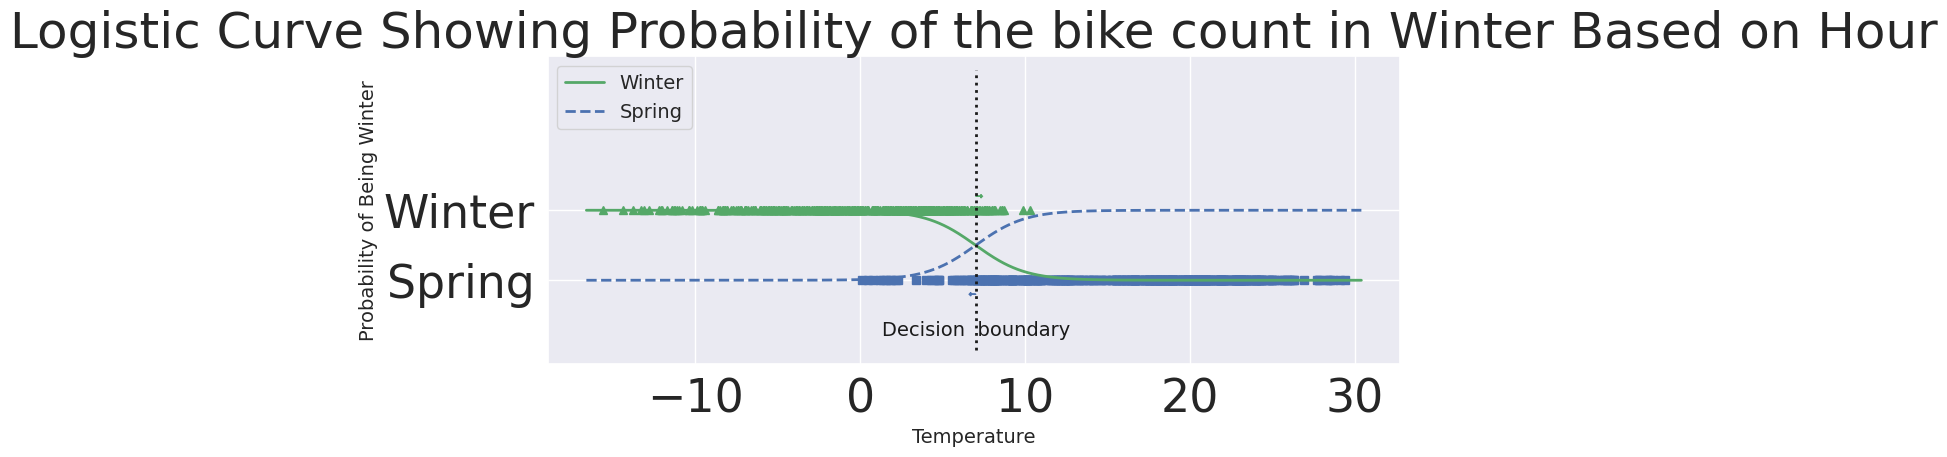

In [16]:
#  Choose size of figure
plt.figure(figsize=(11, 4))

# plot points corresponding to Iris-setosa and Iris-versicolor
plt.plot(X_sv[Y_sv=='Spring'], Y_sv[Y_sv=='Spring'], "bs")
plt.plot(X_sv[Y_sv=='Winter'], Y_sv[Y_sv=='Winter'], "g^")

# Plot the logistic curve; second curve is for comparison
plt.plot(X_sv_compare, y_sv_compare_probability[:, 1], "g-", linewidth=2, label="Winter")
plt.plot(X_sv_compare, y_sv_compare_probability[:, 0], "b--", linewidth=2, label="Spring")

# Plot the decision boundary
plt.plot([decision_boundary, decision_boundary], [-1, 3], "k:", linewidth=2)
plt.text(decision_boundary+0.02, -0.8, "Decision  boundary", fontsize=14, color="k", ha="center")


plt.arrow(decision_boundary[0], -0.2, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary[0], 1.2, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# Label plot
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Probability of Being Winter', fontsize=14)
plt.title('Logistic Curve Showing Probability of the bike count in Winter Based on Hour');
plt.legend(loc="upper left", fontsize=14)
plt.show()


### Part 1.2: Comparing Predicted Labels with Actual Labels

In [10]:
y_pred = log_reg.predict(X_sv)
actually_Spring = np.sum(Y_sv == "Spring")
labeled_Spring = np.sum(y_pred == "Spring")
print(f"Actually Spring: {actually_Spring} Predicted Spring: {labeled_Spring}")

actually_Winter = np.sum(Y_sv == "Winter")
labeled_Winter = np.sum(y_pred == "Winter")

print(f"Actually Winter: {actually_Winter} Predicted Winter: {labeled_Winter}")

Actually Spring: 460 Predicted Spring: 454
Actually Winter: 450 Predicted Winter: 456


The above data does not distinguish between false versus true postives (and similarly for negatives), so we use the confusion matrix.

In [11]:
#from sklearn import metrics and call it metrics.
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(Y_sv, y_pred)
print(cm)

[[429  31]
 [ 25 425]]


AttributeError: 'ConfusionMatrixDisplay' object has no attribute 'tick_params'

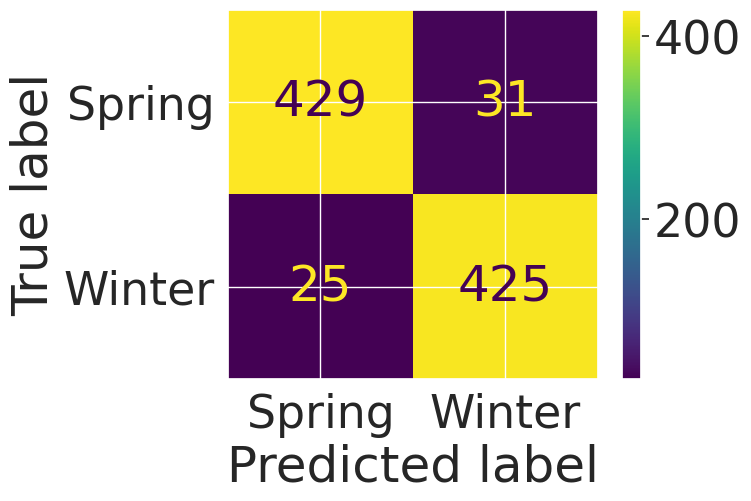

In [14]:
# The 2x2 confusion matrix can also be visualized via a heat map.

cnf_matrix = metrics.confusion_matrix(Y_sv, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=["Spring", "Winter"])
ax=disp.plot()
# sns.set(font_scale=3.0) # Adjust to fit
# sns.heatmap(cnf_matrix, annot=True, ax=ax, cmap="Blues", fmt="g");
ax.tick_params(axis='both', which='major', labelsize=5)  # Adjust to fit
plt.show()

In [17]:
print("Accuracy:", metrics.accuracy_score(Y_sv, y_pred))
print("Precision:", metrics.precision_score(Y_sv, y_pred, pos_label="Winter"))
print("Recall:", metrics.recall_score(Y_sv, y_pred, pos_label="Winter"))

Accuracy: 0.9384615384615385
Precision: 0.9320175438596491
Recall: 0.9444444444444444


##  Part 2 We will now compare results using test/train

We will first partition the data into test versus train ignoring the labels. Observe that the train and test data sets do not have the same ratio of versicolor to setosa.   The following code is modified from https://www.kaggle.com/code/viswanathanc/stratifiedshufflesplit-working-with-less-data

In [ ]:
from sklearn.model_selection import train_test_split

X = X_sv
y = Y_sv

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=13)
print(y_train.value_counts())
print(y_test.value_counts())

In [ ]:
from sklearn.metrics import accuracy_score

# Model 1 with stratified sample
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred_m1=model1.predict(X_test)
acc_m1=accuracy_score(y_pred_m1,y_test)

print(acc_m1)

We will now run logistic regression 5 times using a 5-fold StratifiedShuffleSplit.  The following code is modified from https://www.geeksforgeeks.org/sklearn-stratifiedshufflesplit-function-in-python/

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
sss.get_n_splits(X, y)

In [ ]:
scores = []

# using regression to get predicted data
model1=LogisticRegression()

X = np.array(X)
y = np.array(y)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model1.fit(X_train, y_train)
    pred = model1.predict(X_test)
    scores.append(accuracy_score(y_test, pred))

# get accuracy of each prediction
print(scores)

For the iris data, we expect good scores, so in this case the method did not have much on an effect on the result.  But in practice, one can get very different results. 

Logistic regression is a statistical model used for binary classification task. For the outcomes, it usually just have two possible results (0 and 1 are often used). And, logistic regression is much similar than linear regression we learned before, but the difference is instead of directly outputting the linear combination, it use a logistic (sigmoid) function to obtain the probability of the positive class.

For the graph of logistic regression, the x-axis usually represents the input features of the logistic regression model, in my code, I chose temperature. The y-axis represents the predicted probabilities of the positive classes, here I chose Spring and Summer from my dataset. At first, I chose Spring and Autumn, but the graph didn't look good, I think the problem is the temperature boundary between Spring and Autumn is not very clear, so it is not suitable for logistic regression analysis. For the Spring and Summer, we can see the clear decision boundary on the graph. And the two logistic lines are also clearly seperated. From the graph, we have the conclusion that when the temperature larger than decision boundary, people will rent bike more in Summer, when the temperature lower than decision boundary, people will rent bike more in Spring.

For the confusion matrix, it typically looks like:

|                 | Predicted Negative | Predicted Positive |
|-----------------|--------------------|--------------------|
| Actual Negative | TN                 | FP                 |
| Actual Positive | FN                 | TP                 |

Then, we can get the accuracy, precision, and recall. For our dataset, we find they are all equal to 0.904. Then, we can compare our results using testing and training data. In our data, we found the training and test scores are closed to each other, which indicating a good balance between bias and variance.